In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)

# Parameters
m = 1
Nk = 201
kys =np.linspace(-np.pi, np.pi, Nk)
L = 30 # Open in x-direction

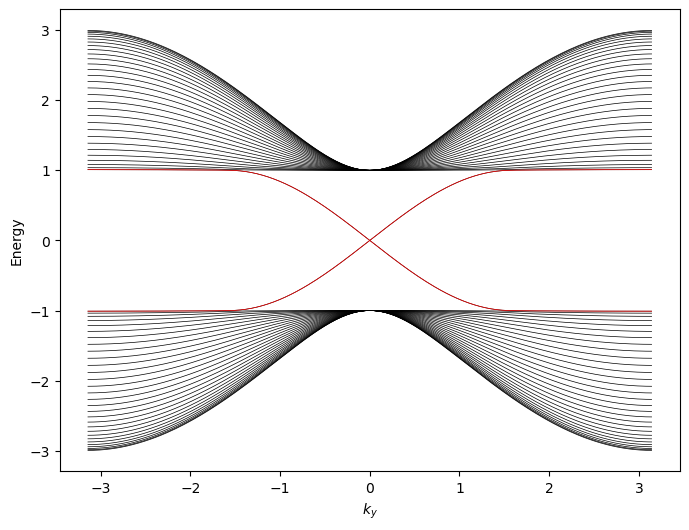

In [ ]:
eigvals_oc_vs_ky = []
for ky in kys:
    H0 = np.sin(ky) * sigma_y + (m - np.cos(ky)) * sigma_z
    V = (-1j / 2) * sigma_x + (1 / 2) * sigma_z

    H_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_open[2*i:2*i+2, 2*i:2*i+2] = H0
        if i < L - 1:
            H_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V
            H_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V.conj().T

    eigenvals_oc, eigenvecs_oc = np.linalg.eigh(H_open)
    eigvals_oc_vs_ky.append(eigenvals_oc)

eigvals_oc_vs_ky = np.array(eigvals_oc_vs_ky).T


plt.figure(figsize=(8,6))
for band in eigvals_oc_vs_ky:
    plt.plot(kys, band, color='black', linewidth=0.5)

# Highlight Edge states
mid = L
for b in [mid-1, mid]:
    plt.plot(kys, eigvals_oc_vs_ky[b], color='red', linewidth =0.5)
    
plt.xlabel('$k_y$')
plt.ylabel('Energy')
plt.show()
